After reading [@KyleOS's post](https://kyso.io/KyleOS/unicorns) about the breakdown of global unicorns I wanted to see how the number stacked up per capita.

Using [CBInsights global unicorn tracker](https://www.cbinsights.com/research-unicorn-companies) and [UN population data for 2019](https://population.un.org/wpp/DataQuery/) I was able to calculate the number of unicorns each country has per 10m people.

First lets just show the ranking of total number of unicorns.

In [176]:
import pandas as pd
%run plot.py

In [181]:
# read the data
df_population = pd.read_csv('./data/populations.txt', delimiter=',')
df_cb = pd.read_excel('./data/CB-Insights_Global-Unicorn-Club_2019.xlsx')

# lets group and count the startups by country
df_startups = df_cb.groupby('Country').count()['Company'].to_frame()

# rename usa so its the same in both datasets
df_startups.rename(index={'United States':'United States of America'},inplace=True)

# merge the dataframes
df = df_startups.merge(df_population, on=['Country'])

# calculate unicorns per 10m people
df['Unicorns per 10m people'] = df['Company']/(df['2019']/10000000)

## Total Unicorns per country 2019

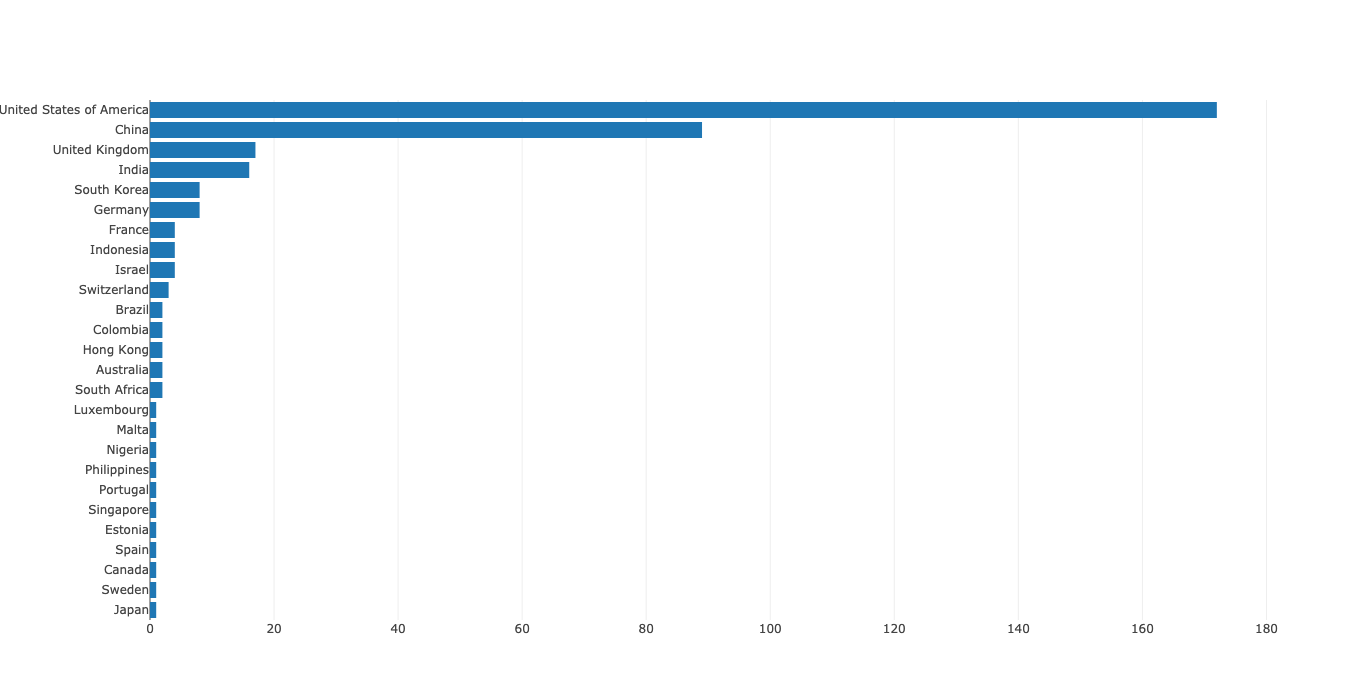

In [178]:
df = df.sort_values('Company')
bar = plotly.graph_objs.Bar(x=df['Company'], y=df['Country'], orientation = 'h')
fig = plotly.graph_objs.Figure(data=[bar], layout=go.Layout(height=700, width=700, margin={"l": 150}))
iplot(fig)

We get results that we expect - the USA and China dominate when it comes to total number of unicorns. They are the worlds two largest economies and both have large populations and homogeneus markets to support such companies.

## Unicorns per 10m people per country 2019

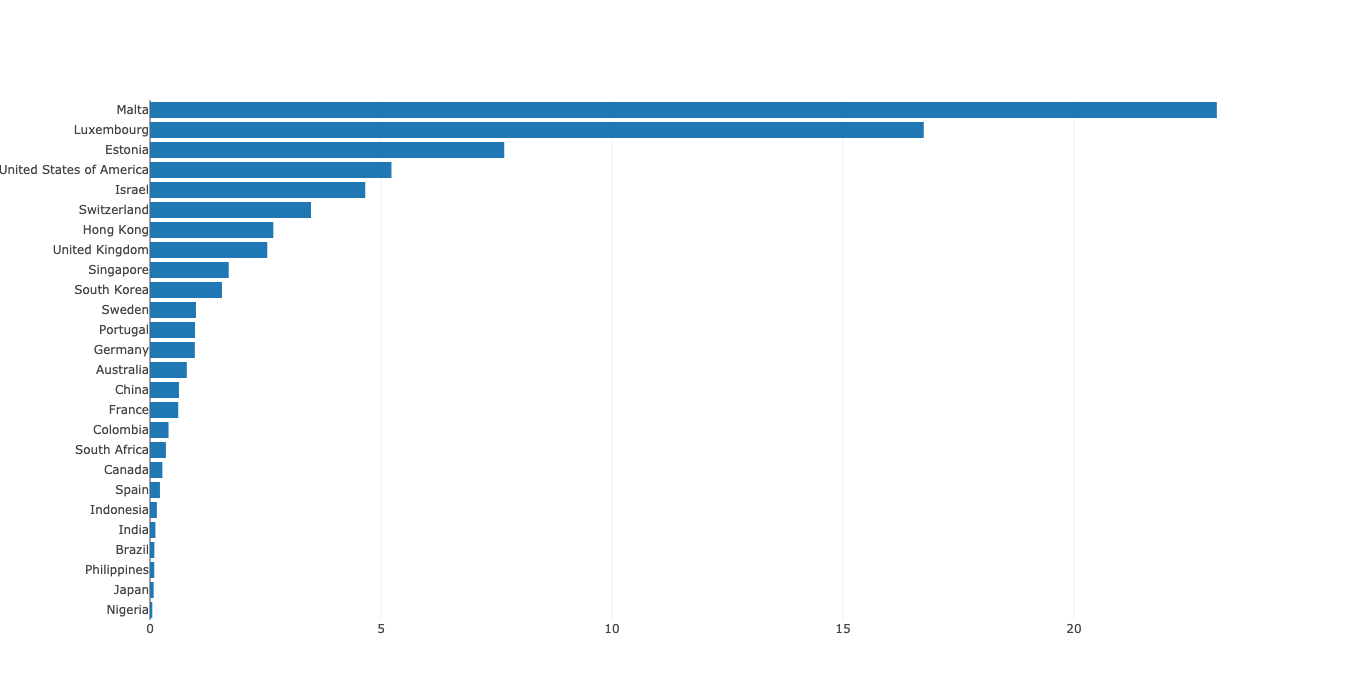

In [179]:
df = df.sort_values('Unicorns per 10m people')
bar = plotly.graph_objs.Bar(x=df['Unicorns per 10m people'], y=df['Country'], orientation = 'h')
fig = plotly.graph_objs.Figure(data=[bar], layout=go.Layout(height=700, width=700, margin={"l": 150}))
iplot(fig)

Here we get a different picture - the top three countries have only one unicorn each and have very small populations. But after Estonia the rest of the countries have at least a population of 7 million.  It shows how the USA ranks really highly even when you take into account the population size. Smaller but high tech countries do really well - Isreal, Switzerland, HK, Singapore. Then we get cluster of European countries. Its suprising that China still does well even with high inequality and such a large population.

Finally just for curiosity lets have a look at a global choropleth map.

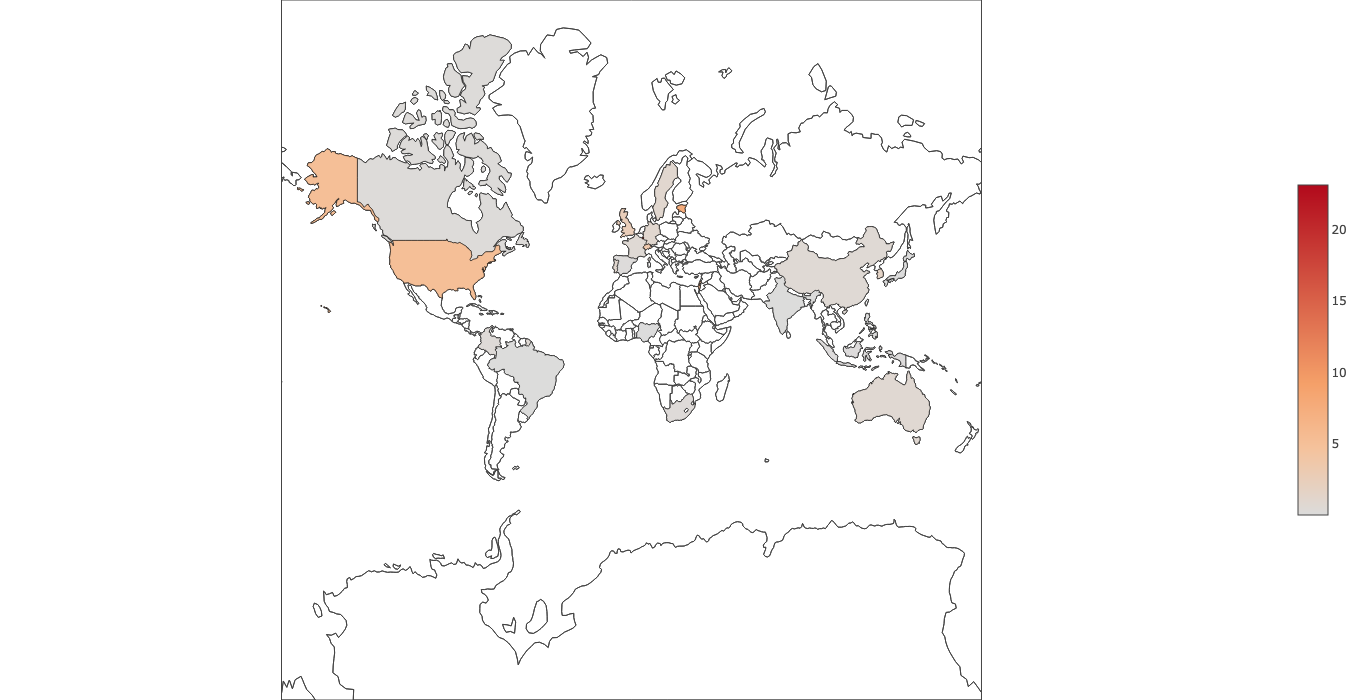

In [193]:
make_plot(df['Country'], df['Unicorns per 10m people'])

Unicorns seem pretty spread out. But if we look at this map again in 10 years I'd probably expect Asian and African countries to be more represented on this map than they are now. 

Finally lets print the entire table sorted alphabetically by country for reference:

In [192]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_cb.sort_values('Country'))

,Company,Valuation ($B),Country,Category,Select Investors
17,Airwallex,1.00,Australia,Fintech,"DST Global, Sequoia Capital China, Tencent Hol..."
52,Canva,1.00,Australia,Collaboration & Project Management,"Sequoia Capital China, Blackbird Ventures, Mat..."
138,iFood,1.00,Brazil,On Demand,"Movile, Just Eat, Naspers"
203,Nubank,4.00,Brazil,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V..."
162,Kik Interactive,1.00,Canada,Social,"Union Square Ventures, RRE Ventures, Spark Cap..."
99,Eggshell Apartment,2.00,China,Real Estate Tech,"JOY Capital, Gaorong Capital, Tiger Global Man..."
101,ESR Cayman (e-Shang Redwood),2.80,China,Drug Development,"SK Group, GF Investments, China Minsheng Banki..."
294,Trendy Group International,2.00,China,Clothing & Accessories,L Capital Partners
103,Face++ (Megvii),1.00,China,AI / Facial Recognition,"Ant Financial Services Group, Russia-China Inv..."
172,Lianjia (Homelink),5.80,China,eCommerce/Marketplace,"Tencent, Baidu, Huasheng Capital"
